## Introduction to Machine Learning, Homework I

__Start date: Saturday February 15__

__Due date: Tuesday February 25__

In this homework, we will practice the notions of linear regression and overfitting that we learned during the first two weeks

__The homework is on 30 points + 2 Bonus pts__

### Question I.1 (18pts)

In this first exercise, we will stuy the effect of regularization on noisy linear data. The plot blow represents a set of training points $\left\{\mathbf{x}^{(i)}, t^{(i)}\right\}_{i=1}^N$ in 1D on form which we would like to learn a regression line. 

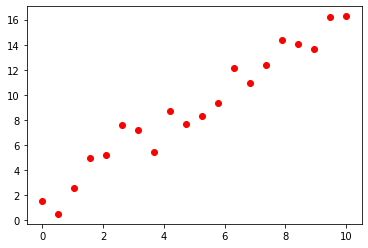

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0,10, 20)
y = 1.5*x + 1

noise = np.random.normal(0,1,len(x))

ynoisy = y + noise

plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.show()

#### Question I.1 (5pts)

Write a function 'linearRegression_Loss' that takes as input the matrix encoding the prototypes, i.e.

$$\mathbf{X} = \left[
  \begin{array}{ccc}
   - & (\mathbf{x}^{(1)})^{T} & - \\
    - & (\mathbf{x}^{(2)})^{T} & - \\
             & \vdots    &          \\
    - & (\mathbf{x}^{(n)})^{T} & -
  \end{array}
\right]$$

where the dataset is given by $\left\{\mathbf{x}^{(i)}, t_i\right\}$ and each $\mathbf{x}^{(i)}\in \mathbb{R}^D$ with 
$$\mathbf{x}^{(i)} = \left[\begin{array}{c}
x^{(i)}_1\\
\vdots \\
x^{(i)}_n\end{array}\right]$$

The function should implement gradient descent steps on the loss function

$$\ell(\boldsymbol{\beta}) = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\boldsymbol{\beta}^T\mathbf{x}^{(i)} +\beta_0\right)\right)^2$$

Here $\mathbf{\beta}$ encodes the weights $\beta_1, \beta_2, \ldots, \beta_D$ of the variables $x^{(i)}_1, \ldots, x^{(i)}_{D}$. 

In [12]:
def linearRegression_Loss(X, t):
    
    '''The function should take as input a matrix of sample points X 
    of size n by D (without the column of 1) as well as a vector of targets t 
    and return a vector of regression coefficients beta'''
    
    learning_rate = 0.001
    beta0 = 1
    beta1 = 1
    
    for j in range(100):
        step0 = 0
        step1 = 0
        loss_step = 0
            
        for i in range(len(X)):
            step0 += beta0 + (beta1 * x[i]) - t[i] 
            step1 += (beta0 + (beta1 * x[i]) - t[i]) * x[i]
            loss_step = (t[i] - (beta1 * x[i] + beta0)) ** 2
        
        beta0 = beta0 - (learning_rate * step0)
        beta1 = beta1 - (learning_rate * step1)
        
        loss = 1/(2*len(X)) * loss_step
                
    return np.array([beta0, beta1])
    

#### Question I.2 (3pts)

Apply your function to the dataset show above and display the resulting line.

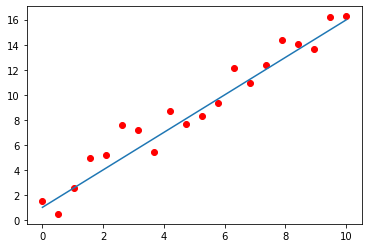

In [13]:
'''Displaying the linear regression model'''
beta = linearRegression_Loss(x, y)

y = [beta[0] + beta[1] * cur_x for cur_x in x]

plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.plot(x,y)
plt.show()


#### Question I.3 (5pts)

We now want to study how a more complex model would behave on our noisy dataset. In order to 
avoid bad surprises, we will start by augmenting your model with a regularization term.

Extend your function 'linearRegression_Loss' with an parameter 'reg' to which we can assign one of the following values 
- 'ridge'
- 'lasso'
- 'none'

Corresponding to the following models (the last choice encoding the OLS formulation given earlier)

$$\ell_{\text{Ridge}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right) + \lambda \sum_{i=1}^{D+1} |\beta_i|^2$$

$$\ell_{\text{LASSO}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right) + \lambda \sum_{i=1}^{D+1} |\beta_i|$$

Your new function should also take an additional argument encoding the weight of the regularization (we will call it lambdaR).

In [14]:
def linearRegression_Loss(X, t, reg, lambdaR):
    
    learning_rate = 0.0000001
    m = np.column_stack([np.ones(len(X)),X])
    betas = np.array(np.ones(m.shape[1]))
    
    for j in range(100):
        mat = np.matmul(m, betas)
        v = np.subtract(mat, t)
        steps = []
        
        for i in range(m.shape[1]):
            steps.append(sum(np.multiply(m[:,i], v * learning_rate)))
            
        if reg == "ridge":
            rid = 0
            for i in betas:
                rid += abs(i) * 2
            for j in range(len(steps)):
                steps[j] += learning_rate*(lambdaR * rid)
    
            betas = np.subtract(betas, steps)
            rid = 0
            for k in betas:
                rid += abs(k) ** 2
            a = 1/(m.shape[0] * 2)
            b = np.dot(v, v.transpose())
            c = lambdaR * rid
            loss = (a * b) + c
            
        else:
            a = 1/(m.shape[0] * 2)
            b = np.dot(v, v.transpose())
            loss = a * b
        print(str(loss))
                                
    return betas

#### Question I.4. (5pts) 

Apply your regularized regression implementation to the data above after generating additional features of the form 
$[x^2, x^3, \ldots, x^p]$ for $p = 10$. Note that this implies that your implementation should be able to handle multiple features. 
On that line you should make sure that your gradient algorithm computes a gradient that encodes all the partial derivatives 
$$\text{grad}_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \left(\frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_1}, \ldots, \frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_{D+1}}\right)$$

plot the result without regularization and for the Ridge regression formulation for a few values of $\lambda$ (let's says $\lambda = 0.1, 1, 10$ and $100$)






In [5]:
'''Use your implementation of linearRegression_Loss below'''

p = 3
power = np.arange(0,p) + 1

x = np.linspace(0, 10, 20)
matrix_p = []
for i in x:
    matrix_p.append(np.power(i, power))
    
t = ynoisy

reg = "ridge"

x = np.array(matrix_p)
lambdaR = [0.1, 1, 10, 100]

for i in np.arange(0,len(lambdaR)):
    beta = linearRegression_Loss(x, t, reg, lambdaR[i])
#     plt.scatter(x.reshape(-1,1), t.reshape(-1,1), facecolor='red')
#     plt.plot(x, [beta[0] + beta[1] * cur_x for cur_x in x])
#     plt.show()
        
        

99280.42192303935
44800.56705095959
20221.48951899633
9132.416415644246
4129.47988927152
1872.3583970020816
854.0358806224556
394.60853733601044
187.33167984015304
93.81472569651228
51.621535887638586
32.58349586031141
23.992090347755052
20.113764604740275
18.36177823468372
17.569103092367442
17.209226026622094
17.04460731945755
16.96807975718116
16.93129454066201
16.912439114829596
16.901672845930015
16.894556243108724
16.889086524299714
16.88436020649842
16.879969735748052
16.87573128103509
16.871561932584857
16.867424303157414
16.8633015373739
16.859186038931853
16.855074386118847
16.850965038795596
16.84685730448172
16.842750872299877
16.83864560298159
16.8345414343087
16.830438338574748
16.826336303475443
16.822235323542508
16.818135396315927
16.814036520642066
16.80993869592245
16.80584192178614
16.801746197949498
16.79765152415788
16.793557900162853
16.789465325714115
16.785373800557426
16.781283324434735
16.77719389708479
16.773105518244126
16.769018187647568
16.7649319050288
1

### Question II. Simplified Stock prediction (12pts)

The lines below can be used to download stock values. As you can see, we will focus on the evolution of the Google stock between December 1st 2004 and October 14th 2005. 

[*********************100%***********************]  1 of 1 completed


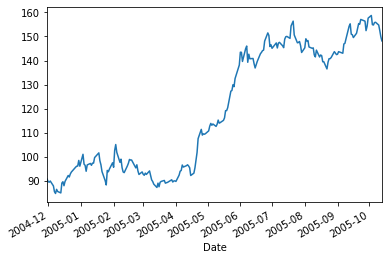

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-11-30   90.017593   91.158318   89.788452   90.650223   90.650223   
2004-12-01   90.635277   90.909248   89.439758   89.643990   89.643990   
2004-12-02   89.614105   90.416100   88.941628   89.365036   89.365036   
2004-12-03   89.639008   90.191940   88.468399   89.863174   89.863174   
2004-12-06   89.230545   90.012611   87.681351   87.815842   87.815842   
...                ...         ...         ...         ...         ...   
2005-10-07  156.807251  157.743744  154.690186  155.910614  155.910614   
2005-10-10  156.070007  156.822189  153.997772  154.744980  154.744980   
2005-10-11  154.725052  155.741241  151.860794  152.478470  152.478470   
2005-10-12  152.030151  153.021439  148.941727  149.923050  149.923050   
2005-10-13  150.436127  150.436127  144.797272  148.164642  148.164642   

              Volume  
Date          

In [6]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2004-12-01','2005-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()
print(data)

#### Question II.1. (5pts)

Now that you have tested your linear regression implementations, we will turn to the regression implementation of scikit-learn. In this exercise, we will use scikit learn to fit a simplified prediction model. We will take an order $p$ prediction model for $p=50$, that is a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i}$$

In [7]:
import sklearn as sklearn 
from sklearn import linear_model
import pandas as pd

from sklearn.linear_model import Ridge

'''Put your code here'''

data1 = {}
for i in range(5, len(data.index)):
    data_close = [data.iloc[i - 1]["Adj Close"],
          data.iloc[i - 2]["Adj Close"],
           data.iloc[i - 3]["Adj Close"],
            data.iloc[i - 4]["Adj Close"],
             data.iloc[i - 5]["Adj Close"]]
    data1[data.index[i]] = data_close

data_list = pd.DataFrame.from_dict(data1, orient='index')
c = Ridge()
c.fit(data_list, data.iloc[5:]["Adj Close"])

#plt.plot(data["Adj Close"])


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Question II.2. (5pts)

On top of the previous values, we would like to capture seasonal trends. Although we would ideally need more than one year of data, we stick to the dataset that you downloaded above. Add a variable to your model that encodes the day of the year at which the stock value is measured. I.e. we want a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i} + \alpha_{P+1} t$$

where $t_i$ encodes the time information (this should be a single number between $1$ and $365$)

In [8]:
'''put your updated model here'''
days = []
for day in data_list.index:
    days.append(day.dayofyear)

data_list["Day of Year"] = days
    
c = Ridge()
c.fit(data_list, data.iloc[5:]["Adj Close"])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Question II.3. (2pts)

Once you have learned your models, load the the history of google stocks for the year 2006 and apply your model to get the predicted prices for all $t = '01-01-2006'$ to $t = '12-01-2006'$. Then compute the prediction error as 

$$\text{err} = \frac{1}{365}\sum_{t=1}^{365} (\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)^2$$

[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2006-11-16', '2006-11-17', '2006-11-20', '2006-11-21',
               '2006-11-22', '2006-11-24', '2006-11-27', '2006-11-28',
               '2006-11-29', '2006-11-30'],
              dtype='datetime64[ns]', name='Date', length=231, freq=None)
Prediction error: 11.828782779315612


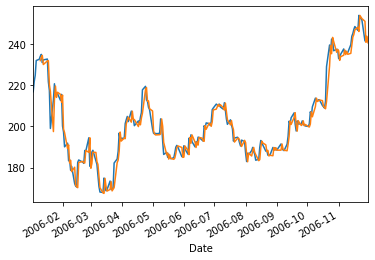

In [9]:
data2 = yf.download('GOOG', '2006-01-01', '2006-12-01')
print(data2.index)

d = {}
for i in range(5, len(data2.index)):
    data_close = [data2.iloc[i - 1]["Adj Close"],
          data2.iloc[i - 2]["Adj Close"],
           data2.iloc[i - 3]["Adj Close"],
            data2.iloc[i - 4]["Adj Close"],
             data2.iloc[i - 5]["Adj Close"]]
    d[data2.index[i]] = data_close

data_list_format = pd.DataFrame.from_dict(d, orient='index')

days = []
for i in data_list_format.index:
    days.append(i.dayofyear)
#print(days)

data_list_format["Day Of Year"] = days
#print(data_list_format)

pred = c.predict(data_list_format)
error = 0

for index, day in enumerate(data_list_format.index):
    pred_error = (pred[index] - data2.loc[day]["Adj Close"]) ** 2
    #print(pred_error)
    error += pred_error

print("Prediction error: " + str(error * (1/365)))
data2['Adj Close'].plot()
plt.plot(data_list_format.index, pred)

### Bonus (2pts) 

A popular family of models for time series analysis is the family of ARMA models. The extension of those models to non stationnarity is known as ARIMA (for Autoregressive Integrated Moving Average). It is possible to access those models through the 'statsmodels' module : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

Try to improve your predictions by fitting an ARIMA model to your data.

Prediction error: 11.889039871309162


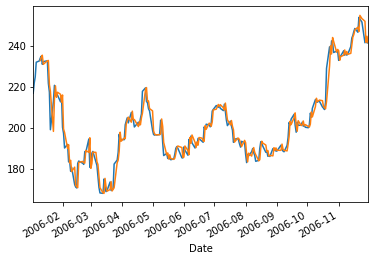

In [10]:
import statsmodels.api as statsmodels
from statsmodels.tsa.arima_model import ARMA

model = statsmodels.OLS(data.iloc[5:]["Adj Close"], data_list)
#print(model.fit().summary())
error = 0
pred2 = model.fit().predict(data_list_format)

for index, day in enumerate(data_list_format.index):
    pred_error = (pred2[index] - data2.loc[day]["Adj Close"]) ** 2
    error += pred_error
    
print("Prediction error: " + str(error * (1/365)))
data2['Adj Close'].plot()
plt.plot(data_list_format.index, pred2)